## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loadind dataset
data = pd.read_csv('census_income.csv')

In [3]:
# Top 5 rows of data set
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# Dimensions of the dataset
data.shape

(32560, 15)

There are 32560 rows and 15 columns present in dataset

In [5]:
# Column names
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
# Datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see that the maximum columns are categorical.

In [7]:
# Statistical information
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observations:
    
(1). The mean is more than median for all columns.
(2). There is large difference between standard deviation and maximum for capital_gain, capital loss.

In [8]:
# Exploring Target Variable
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

We can see that categorical values in Income colum, so this is a classification problem.

In [9]:
# Checking missing values
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

The data has no missing vales. But I see '?' in some columns. 

In [10]:
data.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [11]:
data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
data['Workclass'].mode()

0     Private
dtype: object

The mode of 'Workclass' column is 'Private', we will replace the special character with 'Private'.

In [13]:
data['Workclass'] = data['Workclass'].replace(' ?', 'Private')

In [14]:
data['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [15]:
data['Occupation'].mode()

0     Prof-specialty
dtype: object

The mode of 'Occupation' column is 'Prof-specialty', we will replace the special character with 'Prof-specialty'.

In [16]:
data['Occupation'] = data['Occupation'].replace(' ?', 'Prof-specialty')

In [17]:
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [18]:
data['Native_country'].mode()

0     United-States
dtype: object

The mode of 'Native_country' column is 'United-States', we will replace the special character with 'United-States'.

In [19]:
data['Native_country'] = data['Native_country'].replace(' ?', 'United-States')

In [20]:
data.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Now, its clean...

## Exploratory Data Analysis (EDA)

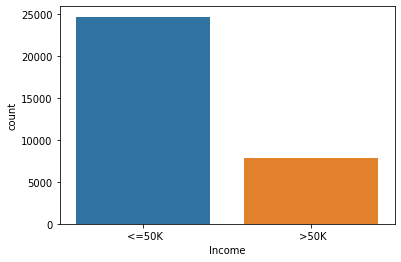

In [21]:
sns.countplot(data['Income'])

Observation:

(1). People whose income is less than or equal to 50k are more compared to people whose income is morethan 50k.
(2). data is imbalance.

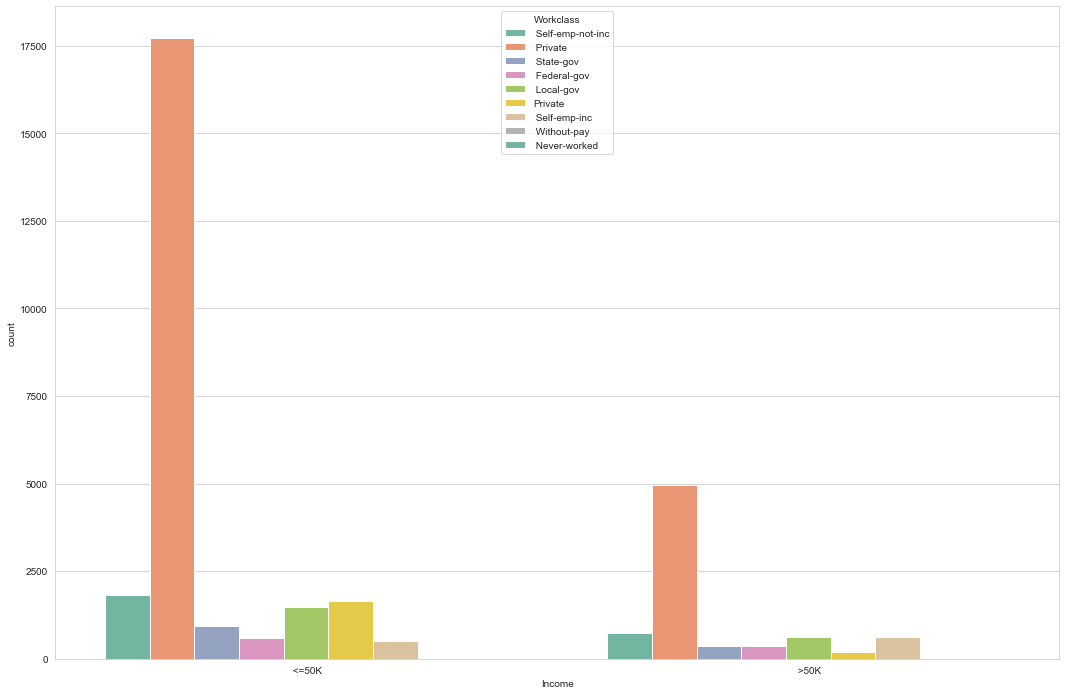

In [22]:
plt.figure(figsize=(18, 12))
sns.set_style ('whitegrid')
sns.countplot(x='Income', hue='Workclass', data=data, palette='Set2')

Observations:
    
(1). Highest number of people in private department have income less than or equal to 50k.

(2). Lowest number of people in unknown department have income greater than 50k.

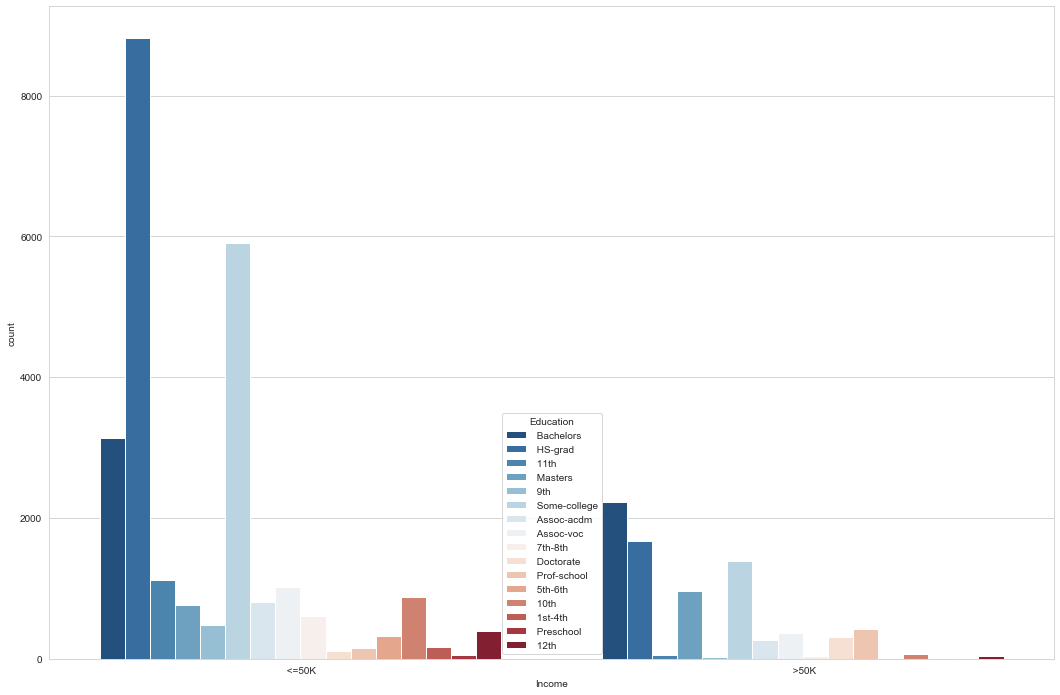

In [23]:
plt.figure(figsize=(18, 12))
sns.set_style ('whitegrid')
sns.countplot(x='Income', hue='Education', data=data, palette='RdBu_r')

Observations:
    
(1). The highest No. of HS-grade have income less or equal to 50k (approx. 9000 people).

(2). Few No. of Bachelors have income greater than to 50k (approx. 9000 people).

In [24]:
data.drop('Education_num', axis=1, inplace=True)

we have drop the column of Education_num as it is formed by applying grouping of Education column.

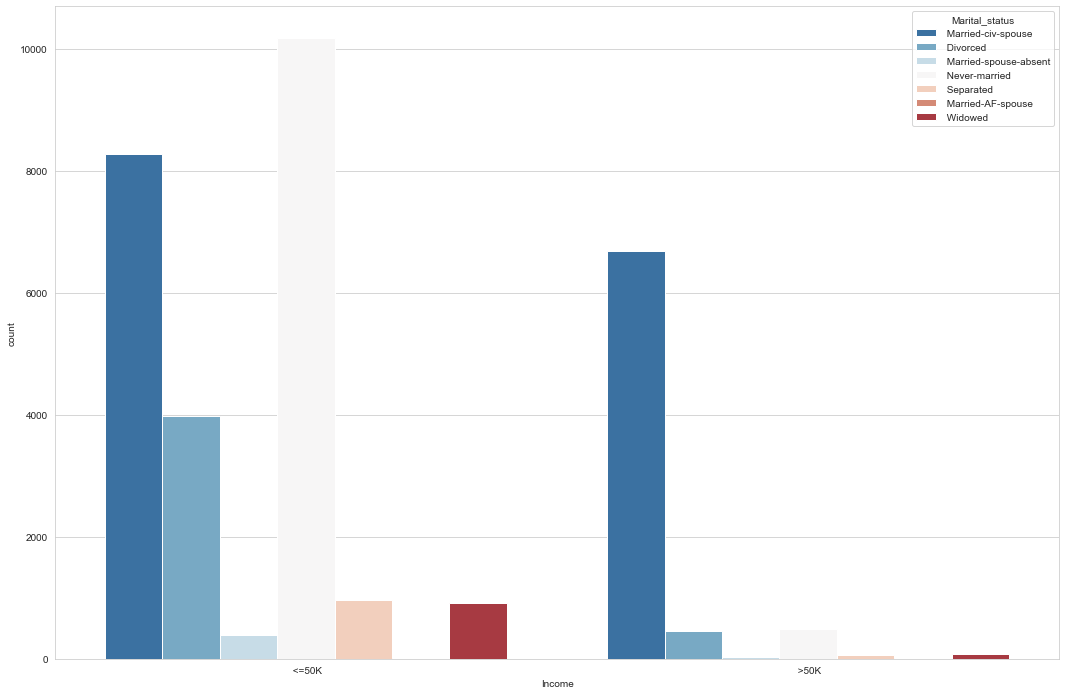

In [25]:
plt.figure(figsize=(18, 12))
sns.set_style ('whitegrid')
sns.countplot(x='Income', hue='Marital_status', data=data, palette='RdBu_r')

Observations:
    
(1). Highest people whose income is less than or equal to 50k are unmarried (never married) they are above 10000.

(2). Highest people whose income is greater than 50k are married-civ-spouse, they are above 6000.

(3).Lowest people whose income is less than or equal to 50k are married-spouse-absent. 

(4).Lowest people whose income is is greater than 50k are separated.

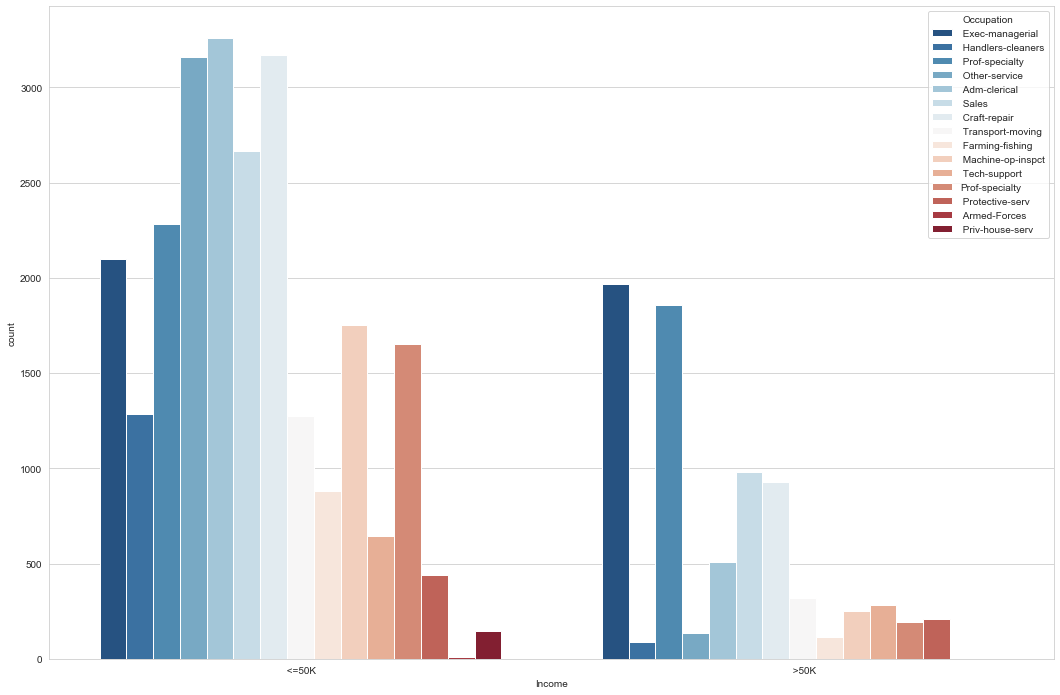

In [26]:
plt.figure(figsize=(18, 12))
sns.set_style ('whitegrid')
sns.countplot(x='Income', hue='Occupation', data=data, palette='RdBu_r')

Observations:

(1). Highest number of executive - managers have income greater than 50k.

(2). Lowest number of handler cleaners have income greater than 50k.

(3). High number of speciality professors, scalers and crafts repairer have income less than or equal to 50k.

(4). Very few number of people in armed forces and private house services have income have income less than or equal to 50k.

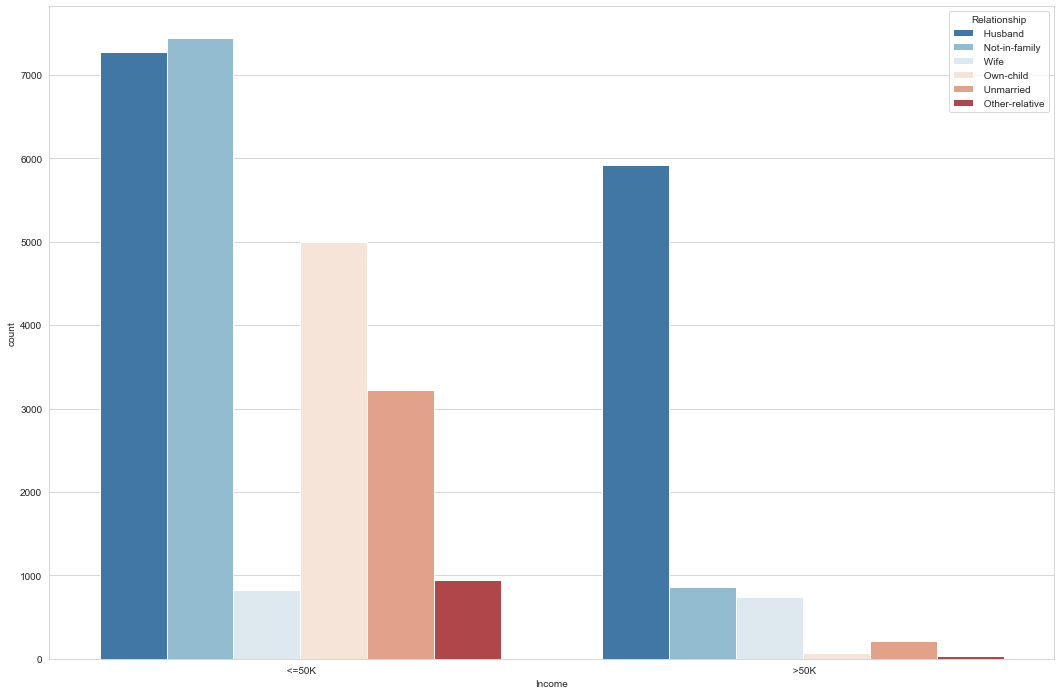

In [27]:
plt.figure(figsize=(18, 12))
sns.set_style ('whitegrid')
sns.countplot(x='Income', hue='Relationship', data=data, palette='RdBu_r')

Obsrvations :-

(1). Highest number of earning people are not in family have income less than or equal to 50k.

(2). Lowest number of people who earning income less than or equal to 50k are wives.

(3). Highest number of earning people are husbands have income greater than 50k.

(4). Lowest number of people who earning income greater than 50k are are other relative.

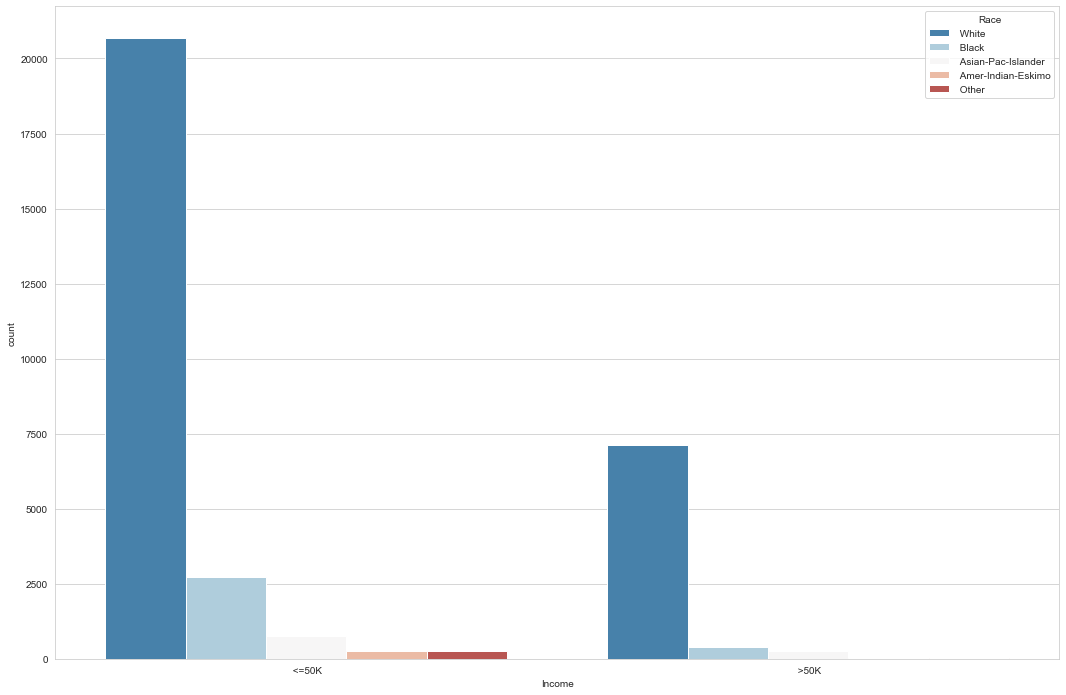

In [28]:
plt.figure(figsize=(18, 12))
sns.set_style ('whitegrid')
sns.countplot(x='Income', hue='Race', data=data, palette='RdBu_r')

Observations:

(1). Highest number of white people have income is less than or equal to 50k.

(2). Lowest number of other people have income less thanor equal to 50k.

(3). Highest number of white people have income is greater than 50k. 

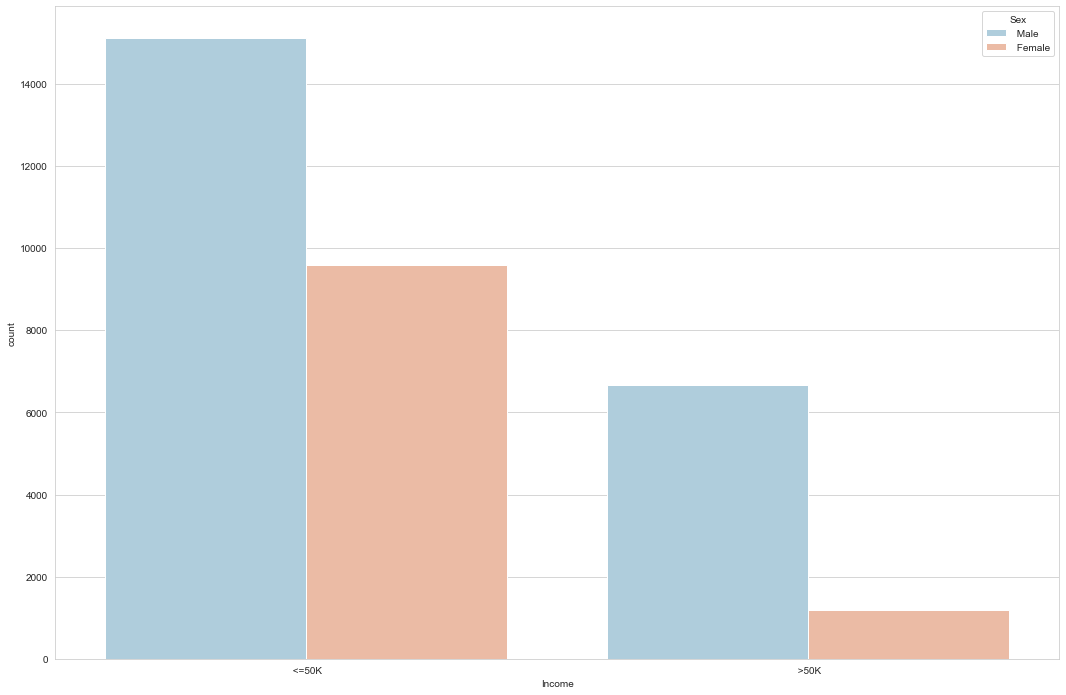

In [29]:
plt.figure(figsize=(18, 12))
sns.set_style ('whitegrid')
sns.countplot(x='Income', hue='Sex', data=data, palette='RdBu_r')

Observation:
    
Morethan No. of Males have income less than 50k compare to Females.

In [30]:
df_int_types = []
for i in data.columns:
    if data[i].dtypes == 'int64':
        df_int_types.append(i) 

In [31]:
df_int_types 

['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

In [32]:
df_str_types = []
for i in data.columns:
    if data[i].dtypes == 'object':
        df_str_types.append(i)

In [33]:
df_str_types

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

## Label Encoder

In [34]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for value in df_str_types:
    data[value]=LE.fit_transform(data[value])
    print(data[value].value_counts().sort_index())

0      960
1     2093
2        7
3    22696
4     1116
5     2541
6     1297
7       14
8     1836
Name: Workclass, dtype: int64
0       933
1      1175
2       433
3       168
4       333
5       646
6       514
7      1067
8      1382
9      5354
10      413
11    10501
12     1723
13       51
14      576
15     7291
Name: Education, dtype: int64
0     4443
1       23
2    14976
3      418
4    10682
5     1025
6      993
Name: Marital_status, dtype: int64
0     3769
1        9
2     4099
3     4066
4      994
5     1370
6     2002
7     3295
8      149
9     4140
10     649
11    3650
12     928
13    1597
14    1843
Name: Occupation, dtype: int64
0    13193
1     8304
2      981
3     5068
4     3446
5     1568
Name: Relationship, dtype: int64
0      311
1     1039
2     3124
3      271
4    27815
Name: Race, dtype: int64
0    10771
1    21789
Name: Sex, dtype: int64
0        19
1       121
2        75
3        59
4        95
5        70
6        28
7       106
8        90
9       

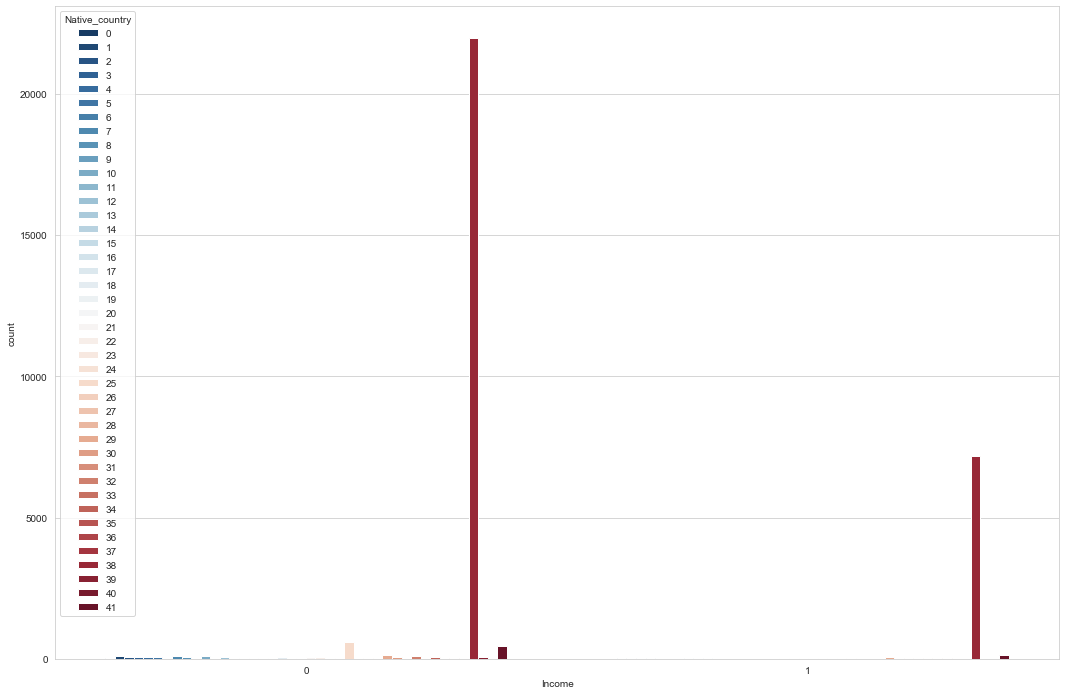

In [35]:
plt.figure(figsize=(18, 12))
sns.set_style ('whitegrid')
sns.countplot(x='Income', hue='Native_country', data=data, palette='RdBu_r')

In [36]:
df_int_types = ['Age', 'Fnlwgt', 'Hours_per_week']

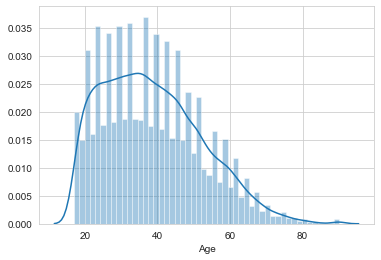

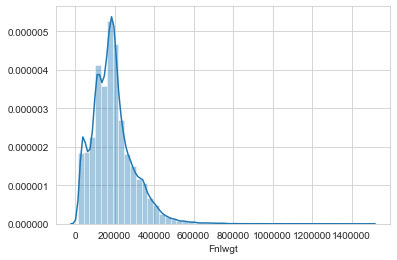

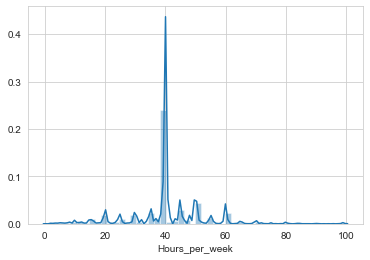

In [37]:
for i in df_int_types:
    sns.distplot(data[i])
    plt.show()

Observations :-

(1). Age of people is majorly in the range of 20-50 according to census.

(2). As per census, hours per week given by people for their work is majorly in the range of 38-42.

(3). The weights on the Current Population Survey (CPS) files is majorly in the range of 200000-400000.

## Correlation

In [38]:
corr = data.corr()
corr

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.059424,-0.076646,-0.010508,-0.266292,0.012628,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000176,0.234039
Workclass,0.059424,1.000000,-0.019111,-0.019358,0.042191,0.312611,0.012832,0.018893,0.002270,0.010680,-0.009878,-0.093413,0.001240,-0.055098
Fnlwgt,-0.076646,-0.019111,1.000000,-0.028156,0.028184,-0.000569,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.062703,-0.009481
Education,-0.010508,-0.019358,-0.028156,1.000000,-0.038398,-0.046460,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.075189,0.079311
Marital_status,-0.266292,0.042191,0.028184,-0.038398,1.000000,0.052891,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.020463,-0.199295
Occupation,0.012628,0.312611,-0.000569,-0.046460,0.052891,1.000000,-0.014638,-0.009948,0.026149,0.012357,0.004530,-0.056999,-0.000467,0.010777
Relationship,-0.263698,0.012832,0.008922,-0.010879,0.185461,-0.014638,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010938,-0.250924
Race,0.028718,0.018893,-0.021278,0.014135,-0.068025,-0.009948,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.111294,0.071853
Sex,0.088832,0.002270,0.026882,-0.027349,-0.129337,0.026149,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.003007,0.215995
Capital_gain,0.077674,0.010680,0.000437,0.030047,-0.043398,0.012357,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,0.009650,0.223333


## Multivariate Analysis

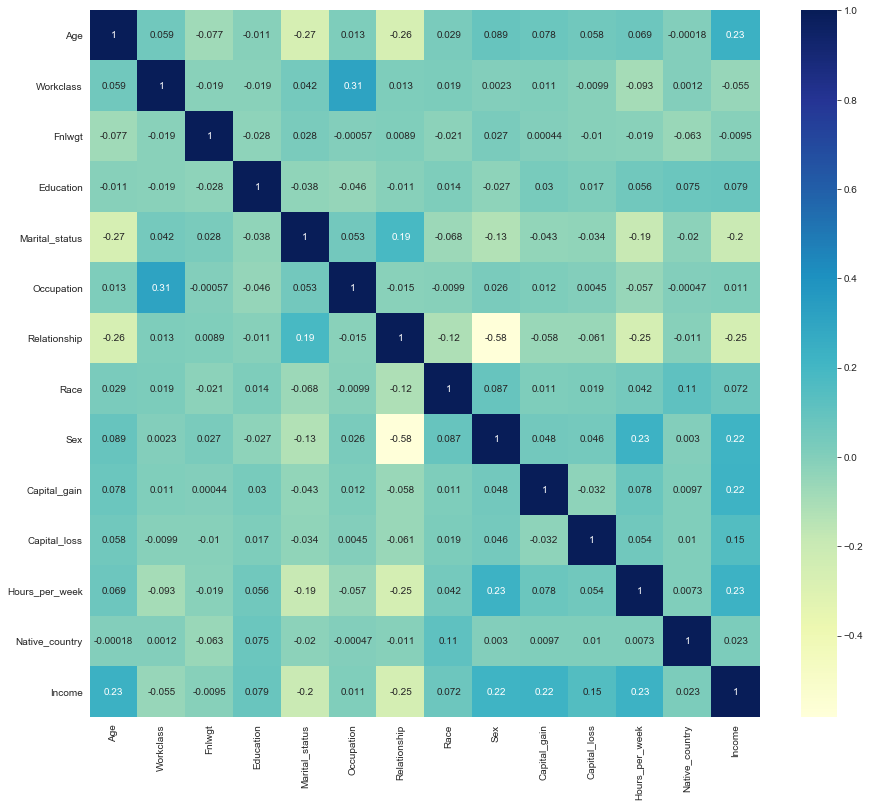

In [39]:
plt.figure(figsize=(15, 13))
sns.heatmap(corr, cmap='YlGnBu', linecolor='black', annot=True)

Observations:
    
(1). Income is highly positively corelated to Age.

(2). Age is highly negatively corelated to Marital Status.

(3). Marital Status is highly positively corelated to Relationship.

(4). Marital Status is highly negatively corelated to Income.

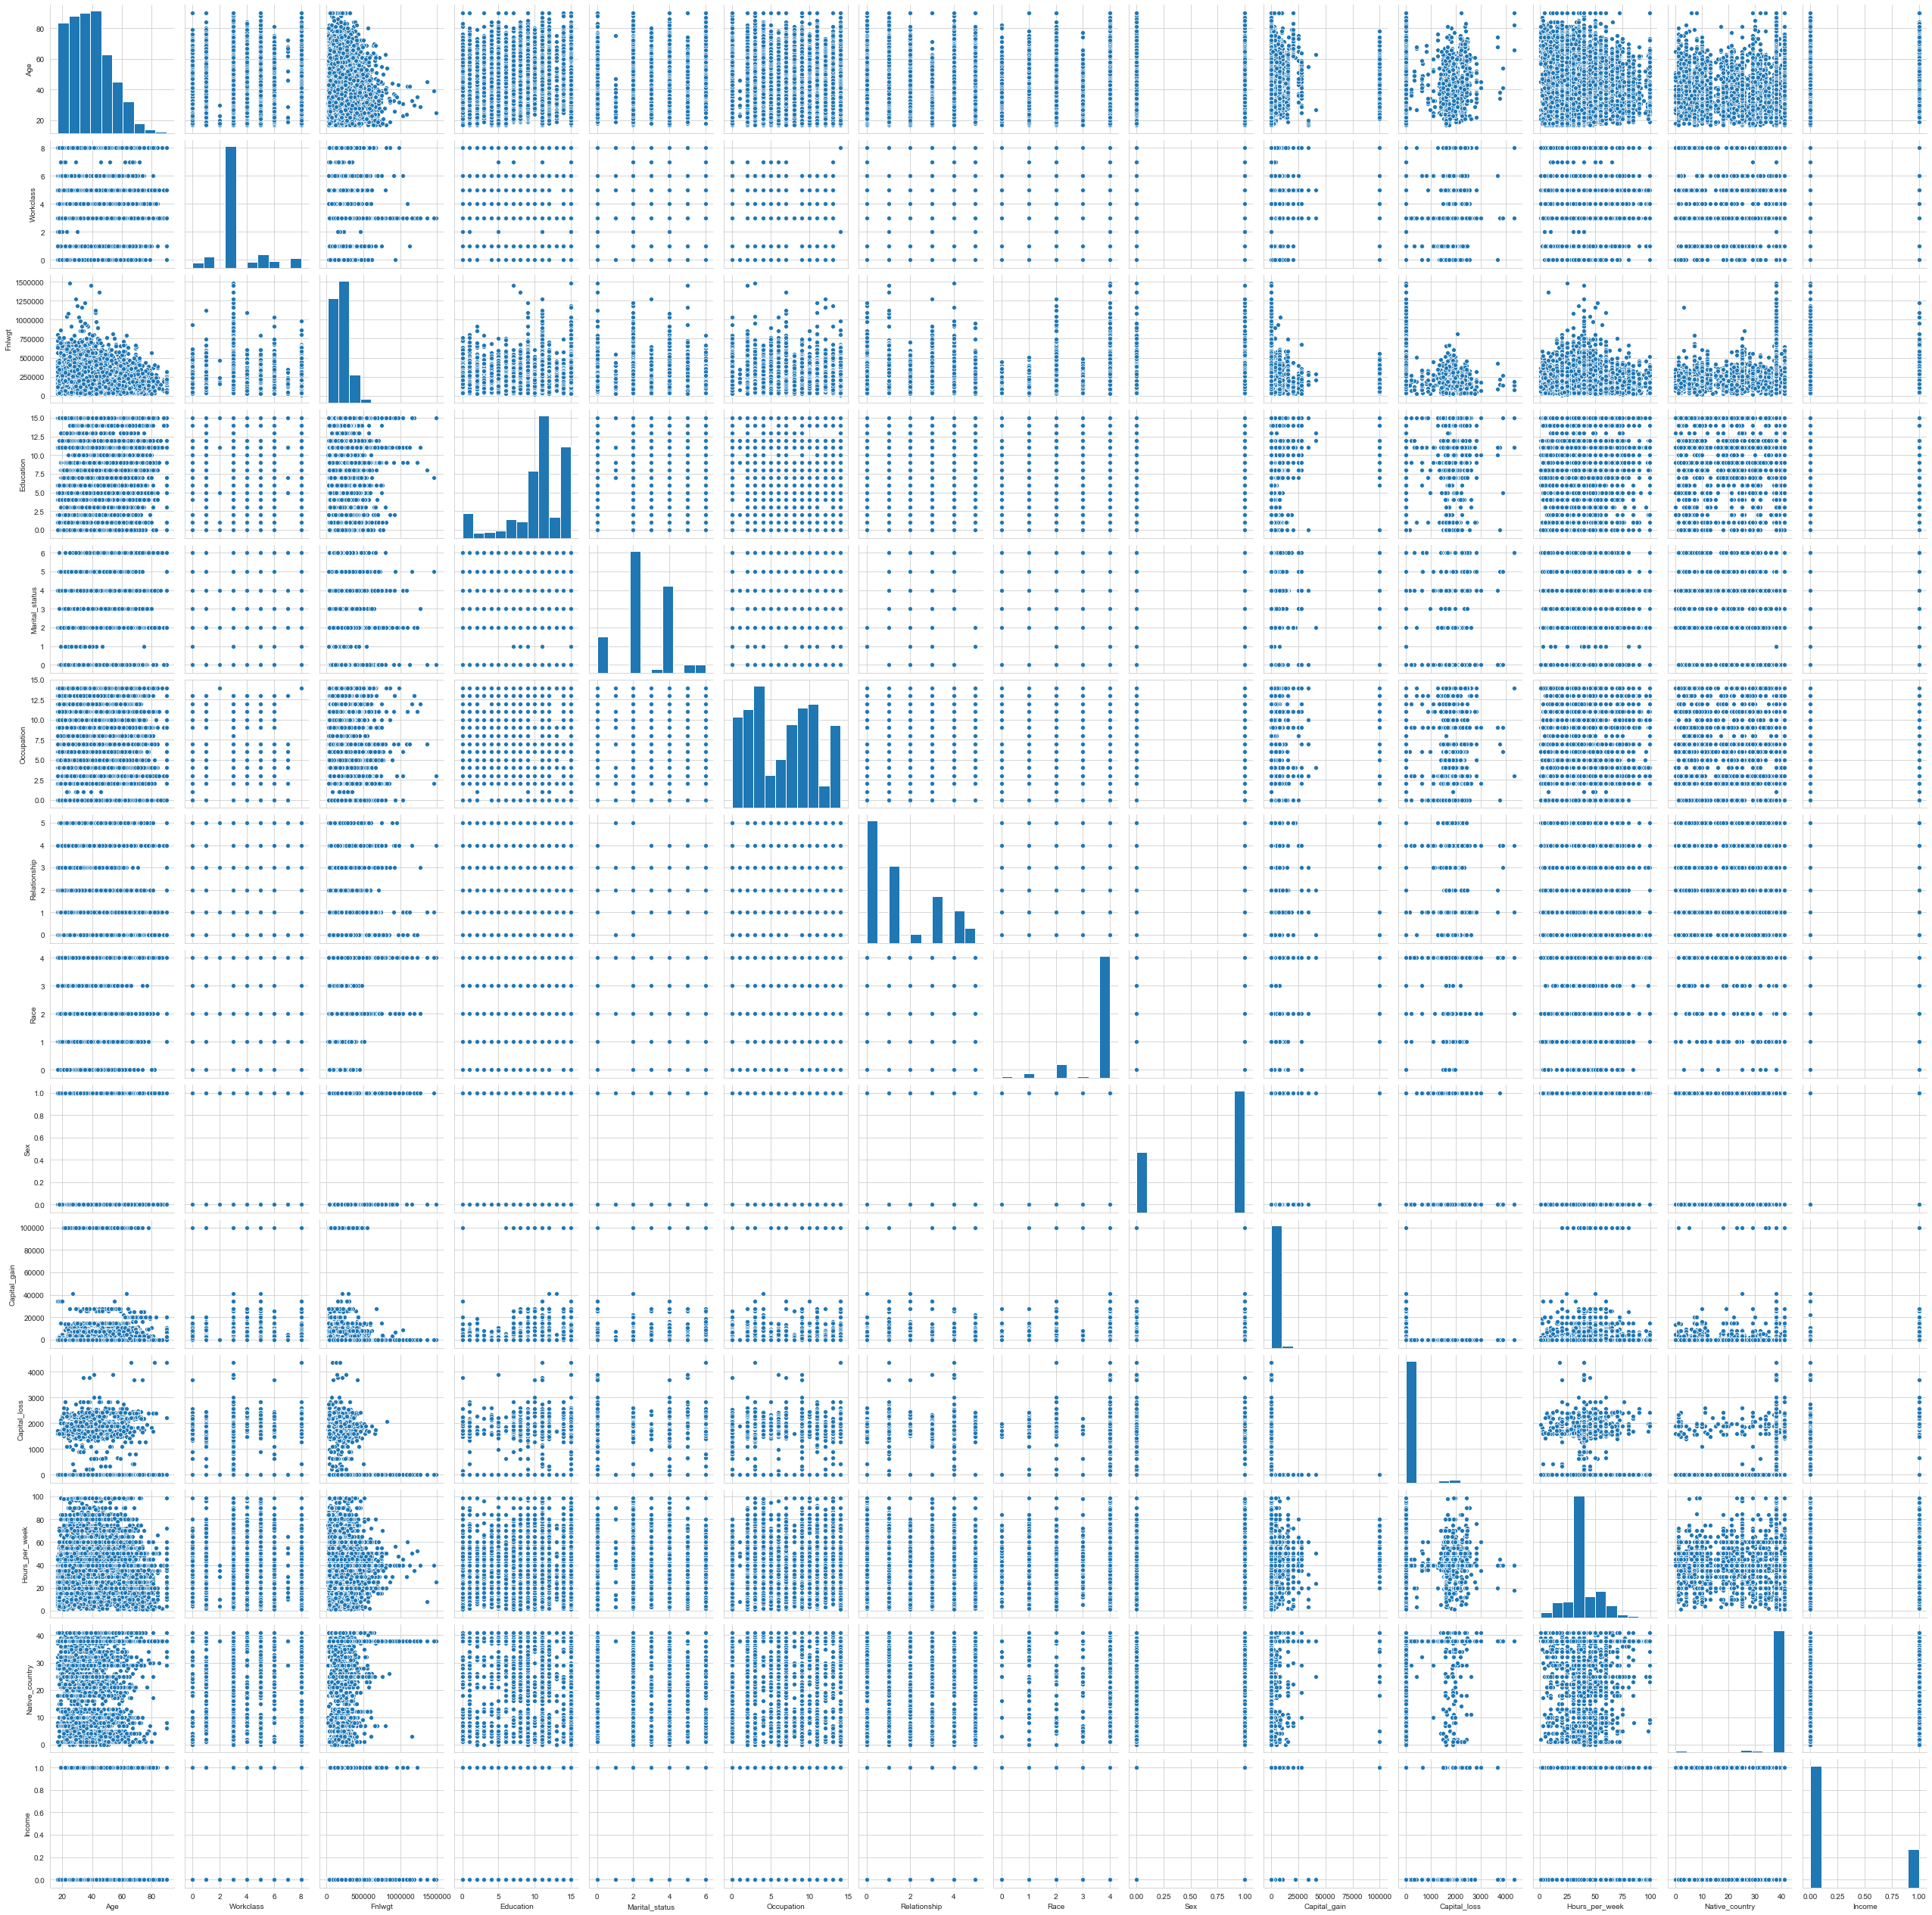

In [40]:
sns.pairplot(data)

## Checking Outliers

Age                  AxesSubplot(0.125,0.125;0.0466867x0.755)
Workclass         AxesSubplot(0.181024,0.125;0.0466867x0.755)
Fnlwgt            AxesSubplot(0.237048,0.125;0.0466867x0.755)
Education         AxesSubplot(0.293072,0.125;0.0466867x0.755)
Marital_status    AxesSubplot(0.349096,0.125;0.0466867x0.755)
Occupation         AxesSubplot(0.40512,0.125;0.0466867x0.755)
Relationship      AxesSubplot(0.461145,0.125;0.0466867x0.755)
Race              AxesSubplot(0.517169,0.125;0.0466867x0.755)
Sex               AxesSubplot(0.573193,0.125;0.0466867x0.755)
Capital_gain      AxesSubplot(0.629217,0.125;0.0466867x0.755)
Capital_loss      AxesSubplot(0.685241,0.125;0.0466867x0.755)
Hours_per_week    AxesSubplot(0.741265,0.125;0.0466867x0.755)
Native_country    AxesSubplot(0.797289,0.125;0.0466867x0.755)
Income            AxesSubplot(0.853313,0.125;0.0466867x0.755)
dtype: object

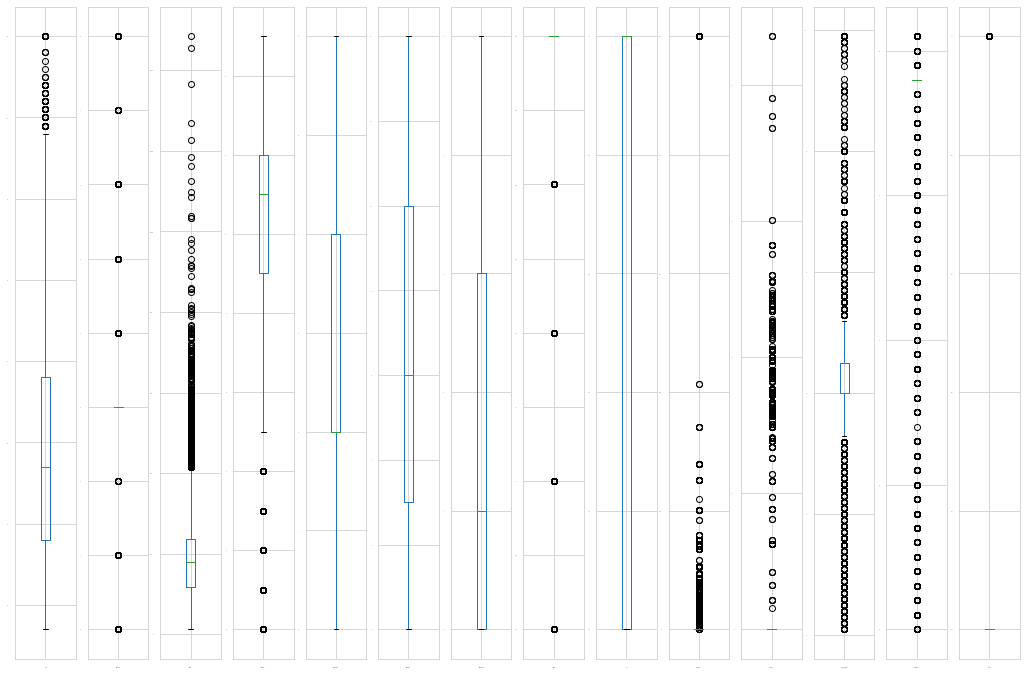

In [41]:
data.plot(kind='box', subplots=True, layout=(1,14), sharex=False, fontsize=1, figsize=(18, 12))

Observations:
    
Age, Workclass, Fnlwgt, Education, Race, Capital_gain, Capital_loss, Hours_per_week, Native_country and Income have outliers.

## Removing Outliers

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.83709708, 1.02638429, 1.0087417 , ..., 2.22212013, 0.25138175,
        0.5632099 ],
       [0.04264043, 0.23786147, 0.24504633, ..., 0.03542999, 0.25138175,
        0.5632099 ],
       [1.05703146, 0.23786147, 0.42576955, ..., 0.03542999, 0.25138175,
        0.5632099 ],
       ...,
       [1.42358875, 0.23786147, 0.3588108 , ..., 0.03542999, 0.25138175,
        0.5632099 ],
       [1.21562378, 0.23786147, 0.11092744, ..., 1.65520046, 0.25138175,
        0.5632099 ],
       [0.98372   , 0.39426141, 0.92986178, ..., 0.03542999, 0.25138175,
        1.77553698]])

In [43]:
threshold = 3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([12, 11,  7, ...,  7,  7,  7], dtype=int64))


In [44]:
df = data[(z<3).all(axis=1)]

In [45]:
print(data.shape)
print(df.shape)

(32560, 14)
(27930, 14)


In [46]:
# Data Loss
Data_loss = ((32560-27930)/32560)*100
Data_loss

14.21990171990172

## Checking skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018CB0C357C8>,
      dtype=object)

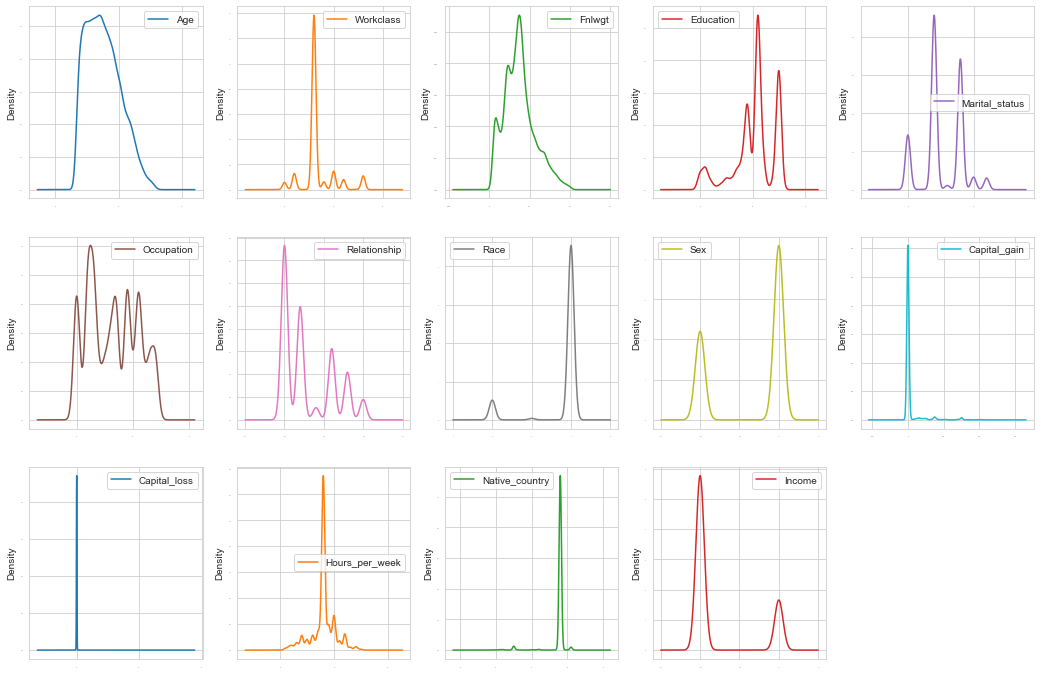

In [47]:
df.plot(kind='density', subplots=True, layout=(3,5), sharex=False, fontsize=1, figsize=(18, 12))

Observations:

(1). Fnlwgt, Relationship, Capital_gain, Capital_loss and Income are right skewed.

(2). Workclass, Education, Race, Sex and Native_country are left skewed.
     

In [48]:
df.skew()

Age                0.483024
Workclass          1.187385
Fnlwgt             0.626662
Education         -0.943160
Marital_status    -0.043667
Occupation         0.137124
Relationship       0.755435
Race              -2.584340
Sex               -0.691989
Capital_gain       4.942469
Capital_loss      29.599730
Hours_per_week    -0.357271
Native_country    -4.961778
Income             1.330576
dtype: float64

In [49]:
df_rs = ['Fnlwgt', 'Relationship', 'Capital_gain', 'Capital_loss']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [50]:
df.skew()

Age                0.483024
Workclass          1.187385
Fnlwgt            -0.113357
Education         -0.943160
Marital_status    -0.043667
Occupation         0.137124
Relationship       0.122033
Race              -2.584340
Sex               -0.691989
Capital_gain       3.692288
Capital_loss      26.517444
Hours_per_week    -0.357271
Native_country    -4.961778
Income             1.330576
dtype: float64

In [51]:
df_rs = ['Capital_gain', 'Capital_loss']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [52]:
df.skew()

Age                0.483024
Workclass          1.187385
Fnlwgt            -0.113357
Education         -0.943160
Marital_status    -0.043667
Occupation         0.137124
Relationship       0.122033
Race              -2.584340
Sex               -0.691989
Capital_gain       3.253269
Capital_loss      25.365794
Hours_per_week    -0.357271
Native_country    -4.961778
Income             1.330576
dtype: float64

In [53]:
df.drop('Capital_loss', axis=1, inplace=True)

we will drop the column Capital_loss as it's skewness is very high.

In [54]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

## Train test split

In [55]:
x = df[['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Hours_per_week', 'Native_country']]
y = df['Income']

## Scaling the data

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.87969434,  1.04069108, -1.12832348, ..., -0.29150528,
        -2.41172817,  0.17449704],
       [-0.01466313, -0.23094851,  0.42025567, ..., -0.29150528,
         0.00778044,  0.17449704],
       [ 1.1032837 , -0.23094851,  0.59739913, ..., -0.29150528,
         0.00778044,  0.17449704],
       ...,
       [ 1.47593265, -0.23094851, -0.23728187, ..., -0.29150528,
         0.00778044,  0.17449704],
       [-1.20713975, -0.23094851,  0.28366825, ..., -0.29150528,
        -1.78444816,  0.17449704],
       [ 1.02875392,  0.40487128,  1.05656245, ...,  4.26147054,
         0.00778044,  0.17449704]])

## Solution of  Imbalance Data

In [57]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
x,y=oversample.fit_resample(x,y)

In [58]:
y.value_counts()

1    21700
0    21700
Name: Income, dtype: int64

## Training and testing of model

In [59]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [60]:
# Creating train test split using best random state
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=42)

In [61]:
# Importing various classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [62]:
# Initializing the instance of the model
Lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()

In [63]:
models = []
models.append(('LogisticRegression',Lr))
models.append(('GaussianNB',gnb))
models.append(('SupportVectorClassifier',svc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))

In [64]:
#Importing required modules
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

---------------------------- LogisticRegression ------------------------------


LogisticRegression()


accuracy_score:  0.7475806451612903


cross_val_score:  0.7509677419354839


roc_auc_score:  0.7472699650925059


Classification report: 

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      4314
           1       0.73      0.80      0.76      4366

    accuracy                           0.75      8680
   macro avg       0.75      0.75      0.75      8680
weighted avg       0.75      0.75      0.75      8680

Confusion matrix: 

[[3000 1314]
 [ 877 3489]]


AUC_ROC Curve:



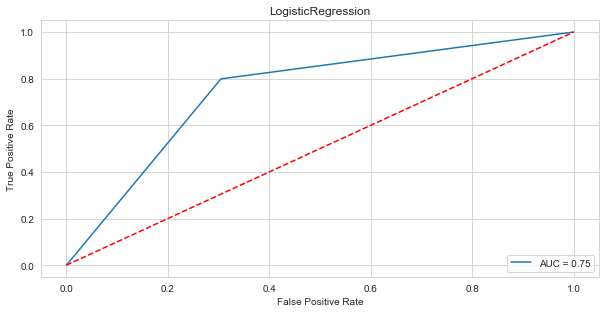

---------------------------- GaussianNB ------------------------------


GaussianNB()


accuracy_score:  0.7608294930875577


cross_val_score:  0.7615437788018433


roc_auc_score:  0.7607187584085818


Classification report: 

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      4314
           1       0.75      0.78      0.77      4366

    accuracy                           0.76      8680
   macro avg       0.76      0.76      0.76      8680
weighted avg       0.76      0.76      0.76      8680

Confusion matrix: 

[[3202 1112]
 [ 964 3402]]


AUC_ROC Curve:



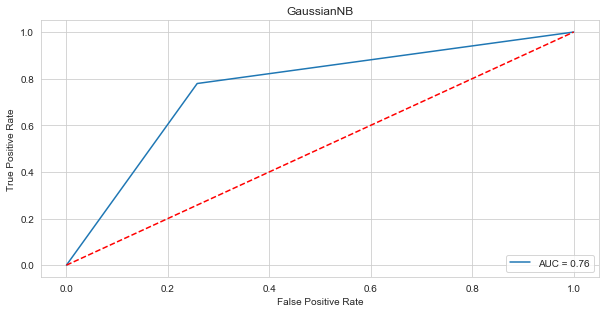

---------------------------- SupportVectorClassifier ------------------------------


SVC()


accuracy_score:  0.8111751152073733


cross_val_score:  0.8148387096774193


roc_auc_score:  0.8107190132543142


Classification report: 

              precision    recall  f1-score   support

           0       0.87      0.73      0.79      4314
           1       0.77      0.89      0.83      4366

    accuracy                           0.81      8680
   macro avg       0.82      0.81      0.81      8680
weighted avg       0.82      0.81      0.81      8680

Confusion matrix: 

[[3169 1145]
 [ 494 3872]]


AUC_ROC Curve:



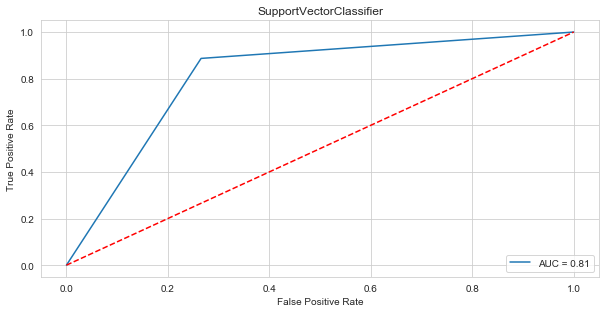

---------------------------- DecisionTreeClassifier ------------------------------


DecisionTreeClassifier()


accuracy_score:  0.8603686635944701


cross_val_score:  0.8565207373271889


roc_auc_score:  0.860345706730752


Classification report: 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4314
           1       0.86      0.86      0.86      4366

    accuracy                           0.86      8680
   macro avg       0.86      0.86      0.86      8680
weighted avg       0.86      0.86      0.86      8680

Confusion matrix: 

[[3695  619]
 [ 593 3773]]


AUC_ROC Curve:



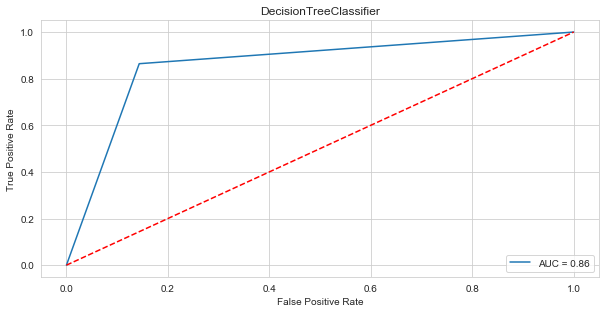

---------------------------- KNeighborsClassifier ------------------------------


KNeighborsClassifier()


accuracy_score:  0.8542626728110599


cross_val_score:  0.857557603686636


roc_auc_score:  0.8537377161702377


Classification report: 

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      4314
           1       0.80      0.94      0.87      4366

    accuracy                           0.85      8680
   macro avg       0.87      0.85      0.85      8680
weighted avg       0.87      0.85      0.85      8680

Confusion matrix: 

[[3305 1009]
 [ 256 4110]]


AUC_ROC Curve:



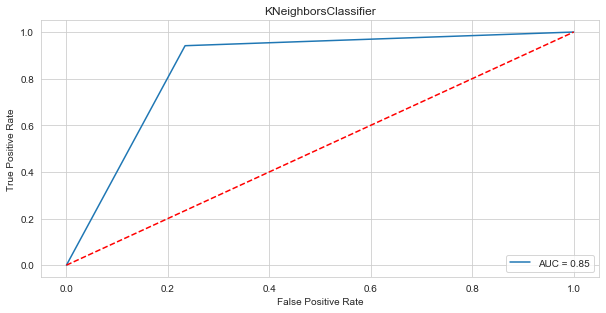

In [65]:
Model = []
Score = []
CV_Score = []
ROC_Score = []

for name, model in models:
    print('----------------------------',name,'------------------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train, y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    
    AS=accuracy_score(y_test, pre)
    print('accuracy_score: ', AS)
    Score.append(AS*100)
    print('\n')
    
    cvs=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ', cvs)
    CV_Score.append(cvs*100)
    print('\n')
    
    false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test, pre)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score: ', roc_auc)
    ROC_Score.append(roc_auc*100)
    print('\n')
   
    print('Classification report: \n')
    print(classification_report(y_test, pre))
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test, pre)
    print(cm)
    print('\n')
    
    plt.figure(figsize=(10, 50))
    plt.subplot(912)
    print('AUC_ROC Curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [66]:
# Result store in DataFrame
Result = pd.DataFrame({'Model':Model, 'Accuracy Score':Score, 'CV Score':CV_Score, 'ROC AUC Score':ROC_Score})
Result

,Model,Accuracy Score,CV Score,ROC AUC Score
0,LogisticRegression,74.758065,75.096774,74.726997
1,GaussianNB,76.082949,76.154378,76.071876
2,SupportVectorClassifier,81.117512,81.483871,81.071901
3,DecisionTreeClassifier,86.036866,85.652074,86.034571
4,KNeighborsClassifier,85.426267,85.755760,85.373772


From the above algorithms, we can say that the DecisionTreeClassifier is working well by giving an accuracy of 86.03% and cross validation score of 85.65%. Now we will perform Hyperparameter Tuning to improve accuracy of our model (i.e, Decision Tree Classifier)

## Hyperparameter tuning

In [89]:
from sklearn.model_selection import GridSearchCV

In [93]:
parameter={
    'criterion':['gini', 'entropy'],
    'min_samples_split':range(1,10),
    'max_depth':range(1,10),
    'min_samples_leaf':range(1,5)
}

In [94]:
grid = GridSearchCV(dtc,
                   param_grid=parameter,
                   cv=10,
                   verbose=1,
                    n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [95]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [96]:
grid.best_score_

0.8402073732718893

As we can see that the score is decrease.

## Saving the model

In [98]:
import joblib
joblib.dump(dtc, 'census_income.pkl')

['census_income.pkl']